## Task 2: IRIS FLOWER CLASSIFICATION

The iris dataset contains measurements for 150 iris flowers from three different species.

### Importing some basic libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [24]:
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Performing a check to see whether there are any missing values or not.

In [26]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data visualisation

<Figure size 600x400 with 0 Axes>

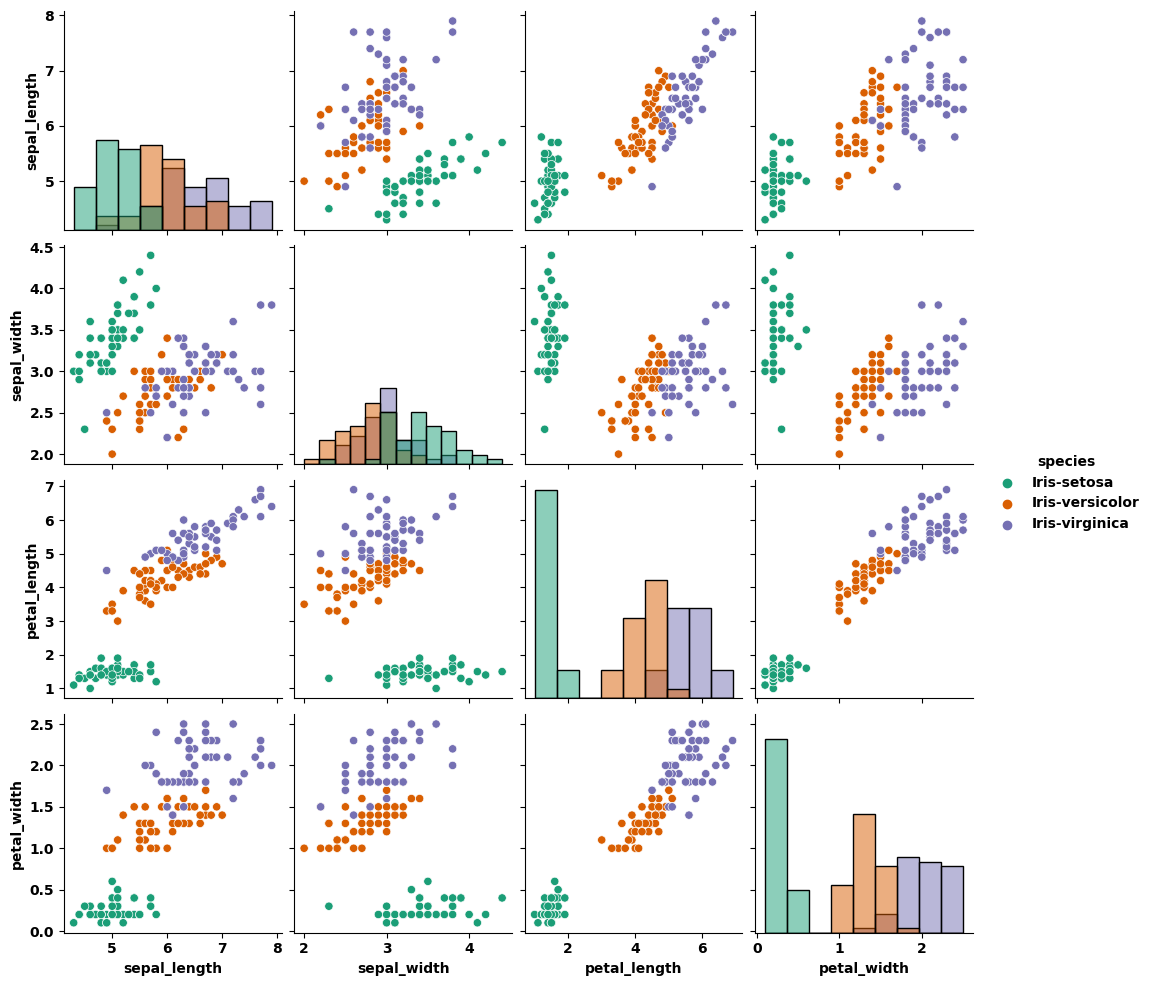

In [27]:
plt.figure(figsize=(6,4))
sns.pairplot(iris,diag_kind='hist',hue='species',palette='Dark2')
%matplotlib inline


In [28]:
iris['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

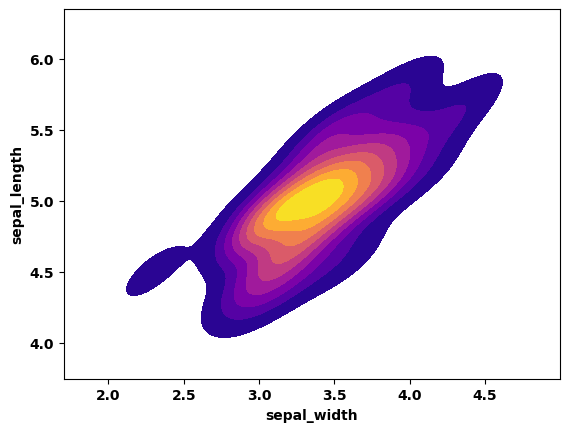

In [29]:
setosa=iris[iris['species']=='Iris-setosa']
sns.kdeplot(iris,x=setosa['sepal_width'],y=setosa['sepal_length'],fill=True,cmap='plasma')
%matplotlib inline

## Splitting the data into training and testing set

### Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X=iris.drop('species',axis=1)
y=iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [32]:
from sklearn.svm import SVC

In [33]:
svc_model=SVC()

In [34]:
svc_model.fit(X_train,y_train)

SVC()

### Using GridSearch to find the best parameters for the model

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [37]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=6)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=6)

In [38]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [39]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [40]:
preds=grid.predict(X_test)

In [41]:
predictions_data=pd.DataFrame(X_test)
predictions_data['Predicted Species']=preds
predictions_data

,sepal_length,sepal_width,petal_length,petal_width,Predicted Species
33,5.5,4.2,1.4,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor
123,6.3,2.7,4.9,1.8,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
146,6.3,2.5,5.0,1.9,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa


### Model Evaluation

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

